<a href="https://colab.research.google.com/github/Samson871/Petrol_Price_Pridiction/blob/main/Petrol_Price_Pridiction_iNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/train_data.csv')
Test_DF = pd.read_csv('/test_data.csv')

# Drop null values
df = df.dropna(subset=['Petrol (USD)'])

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)

# Rename the column for consistency
df.rename(columns={'Petrol (USD)': 'Price'}, inplace=True)








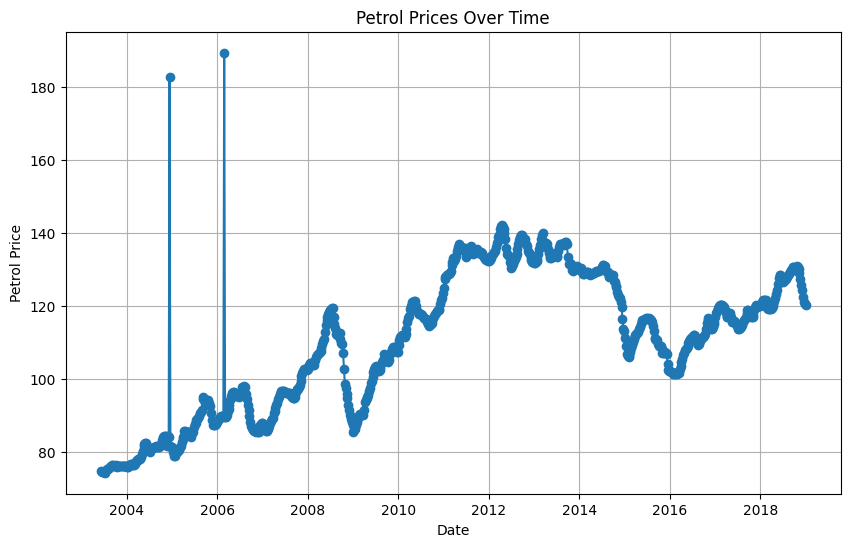

In [19]:
# Feature Engineering: Extract features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define the target and features
y = df['Price']
X = df[['Year', 'Month', 'Day']]

# Plot Data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.grid(True)
plt.show()

In [20]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the validation set
preds = model.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

# Print the predictions
print(preds)

MAE: 2.077628834355827
[110.2628  95.2777  81.4462 138.1102  75.9255  76.1169 137.1939 134.2111
 105.7515 119.7862 108.0069 137.231   75.5566  94.7575 117.1797 115.133
 137.726   85.2864  89.8101 113.5919 127.4708 135.6355  81.9858 136.4884
 134.7646 119.0313 109.2297 119.4461  89.7593 129.4784  96.0408  89.2751
  95.2877 115.9911 134.7049 114.6281  86.5908 113.2758 121.8917 129.2279
 111.5473 106.7     82.939  134.1641 107.8883 125.1691 129.3357 105.3503
  76.2172 100.4136 132.579  107.5756 115.1946 134.2513 104.9011  77.0755
 118.5587 128.6652 130.7237 134.2172 115.9826  92.6648  92.2918 133.1762
 138.4184 129.3364 117.7218 127.2838 100.4001 113.575  102.2799 138.3208
 110.7612 119.3325 121.1368  95.6226 116.722  137.4157 138.0463  82.8311
  79.5369 121.3217  86.1088 117.0057  74.7708 129.5652  74.6261  89.9286
 114.9503 103.3175 114.1439 118.0186 129.1926  88.5413 134.2638 107.3196
 134.6205 128.4855 116.9061 133.5502 102.6943 132.3341 129.0219 108.1263
 135.8634 103.0292 117.6983 1

         Date  Prediction  Year  Month  Day
0  2019-01-01    120.5604  2019      1    1
1  2019-01-02    120.5134  2019      1    2
2  2019-01-03    120.5134  2019      1    3
3  2019-01-04    120.8891  2019      1    4
4  2019-01-05    120.8891  2019      1    5
5  2019-01-06    120.8891  2019      1    6
6  2019-01-07    121.0596  2019      1    7
7  2019-01-08    121.0994  2019      1    8
8  2019-01-09    121.2051  2019      1    9
9  2019-01-10    121.2051  2019      1   10
10 2019-01-11    121.1589  2019      1   11
11 2019-01-12    121.1851  2019      1   12
12 2020-01-01    120.5604  2020      1    1
13 2020-01-02    120.5134  2020      1    2
14 2020-01-03    120.5134  2020      1    3
15 2020-01-04    120.8891  2020      1    4


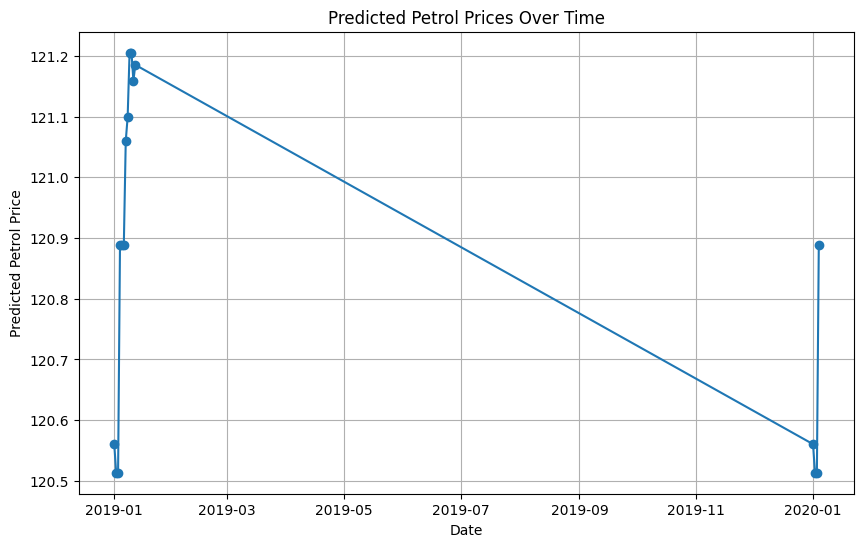

In [38]:


# Process the test dataset
Test_DF['Date'] = pd.to_datetime(Test_DF['Date'])
Test_DF.sort_values(by='Date', inplace=True)

# Feature Engineering on the test dataset
Test_DF['Year'] = Test_DF['Date'].dt.year
Test_DF['Month'] = Test_DF['Date'].dt.month
Test_DF['Day'] = Test_DF['Date'].dt.day

# Make predictions on the test set
preds_test = model.predict(Test_DF[['Year', 'Month', 'Day']])

# Add the predictions to the test DataFrame
Test_DF['Prediction'] = preds_test

# Print the first 10 rows of the test DataFrame
print(Test_DF.head(30))

# Plot the predictions
plt.figure(figsize=[10, 6])
plt.plot(Test_DF['Date'], Test_DF['Prediction'], marker='o', linestyle='-')
plt.title('Predicted Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Petrol Price')
plt.grid(True)
plt.show()

In [28]:
sample_sub = pd.read_csv('/sample_submission.csv')
df.head(10)


,Date,Prediction
0,1/1/2019,100
1,1/2/2019,100
2,1/3/2019,100
3,1/4/2019,100
4,1/5/2019,100
5,1/6/2019,100
6,1/7/2019,100
7,1/8/2019,100
8,1/9/2019,100
9,1/10/2019,100


In [29]:
# Create the submission file
submission = sample_sub.copy()
submission['Prediction'] = preds_test
submission.to_csv('submission.csv', index=False)
print('Submission file created.')

Submission file created.


In [31]:
submission.head(10)

,Date,Prediction
0,1/1/2019,120.5604
1,1/2/2019,120.5134
2,1/3/2019,120.5134
3,1/4/2019,120.8891
4,1/5/2019,120.8891
5,1/6/2019,120.8891
6,1/7/2019,121.0596
7,1/8/2019,121.0994
8,1/9/2019,121.2051
9,1/10/2019,121.2051
